In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import replay_rank_order
import functions,loading
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [22]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
cell_metrics = loading.load_all_cell_metrics(df.basepath)

In [23]:
keep_idx = (cell_metrics.putativeCellType.str.contains('Pyramidal') &
            cell_metrics.brainRegion.str.contains('CA1'))
cell_metrics = cell_metrics[keep_idx]


<AxesSubplot:xlabel='deepSuperficialDistance', ylabel='burstIndex_Mizuseki2012'>

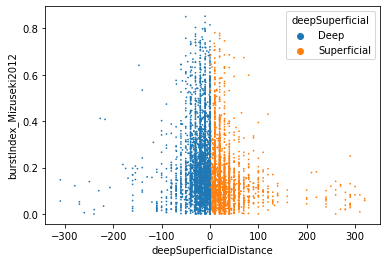

In [24]:
sns.scatterplot(data=cell_metrics, x="deepSuperficialDistance", y="burstIndex_Mizuseki2012",
                hue="deepSuperficial",
                linewidth=0,s=3)

In [25]:
cell_metrics.shape

(8555, 265)

In [28]:
cell_metrics[np.isnan(cell_metrics.deepSuperficialDistance)][['UID','basepath']]
cell_metrics[np.isnan(cell_metrics.deepSuperficialDistance)].basepath.value_counts()[0:30]


Z:\Data\GirardeauG\Rat08\Rat08-20130718      44
Z:\Data\Kenji\ec014.459_480                  44
Z:\Data\Kenji\i01_maze04_MS.001_003          42
Z:\Data\Kenji\ec014.427_456                  40
Z:\Data\Kenji\ec014.133_141                  39
Z:\Data\ORproject\OR18\day3                  35
Z:\Data\Kenji\nlx_070329                     34
Z:\Data\ORproject\OR21\day4                  33
Z:\Data\Kenji\ec013.608_632                  33
Z:\Data\Kenji\ec014.370_396                  32
Z:\Data\Kenji\ec016.228_240                  32
Z:\Data\ORproject\OR21\day2                  30
Z:\Data\GirardeauG\Rat11\Rat11-20150328      30
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013    26
Z:\Data\GirardeauG\Rat08\Rat08-20130712      25
Z:\Data\GirardeauG\Rat11\Rat11-20150326      24
Z:\Data\Kenji\ec016.425_437                  23
Z:\Data\Kenji\ec016.390_405                  22
Z:\Data\Kenji\ec015.037_058                  21
Z:\Data\Kenji\ec016.577_590                  21
Z:\Data\Kenji\f01_maze08_MS.001_003     

In [19]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")
avg_rip = []
channel_df_all = pd.DataFrame()
for basepath in df.basepath:
    channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(basepath)
    avg_rip.append(np.hstack(ripple_average).T)
    channel_df['basepath'] = basepath
    channel_df_all = pd.concat([channel_df_all,channel_df],ignore_index=True)


KeyboardInterrupt



In [18]:
basepath

'Z:\\Data\\AYAold\\AYA10\\day25'

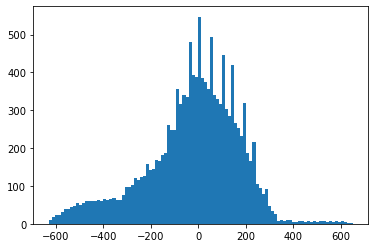

In [9]:
plt.hist(channel_df_all.channelDistance,100)
plt.show()

In [35]:
channel_df_all

'Z:\\Data\\GirardeauG\\Rat08\\Rat08-20130708'

In [ ]:
channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(basepath)

In [30]:
import scipy.io as sio
import glob


basepath = r"Z:\Data\Kenji\ec014.459_480"
channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(basepath)
channel_df


,channel,channelDistance,channelClass,shank,ripple_power,ripple_amplitude,SWR_diff,SWR_amplitude
0,1,0.0,Deep,0.0,0.339652,0.452168,0.477821,0.000000
1,2,-10.0,Deep,0.0,0.306845,0.039188,0.561992,0.130341
2,3,-20.0,Deep,0.0,0.596234,0.691777,0.591699,0.185541
3,4,-30.0,Deep,0.0,0.969106,-1.000000,0.679529,0.325778
4,5,-40.0,Deep,0.0,0.512357,-0.032866,0.733745,0.430672
...,...,...,...,...,...,...,...,...
91,92,50.0,Superficial,11.0,0.461468,0.048909,-0.958635,0.550648
92,93,40.0,Superficial,11.0,0.466822,0.058950,-0.907529,0.085764
93,94,30.0,Superficial,11.0,0.704850,0.659553,-0.973896,0.546790
94,95,20.0,Superficial,11.0,0.543878,0.323865,-0.948092,0.282345


In [17]:
np.hstack(ripple_average).T.shape

(96, 301)

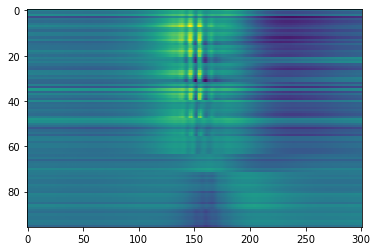

In [12]:
plt.imshow(np.hstack(ripple_average).T,aspect='auto',interpolation='nearest')

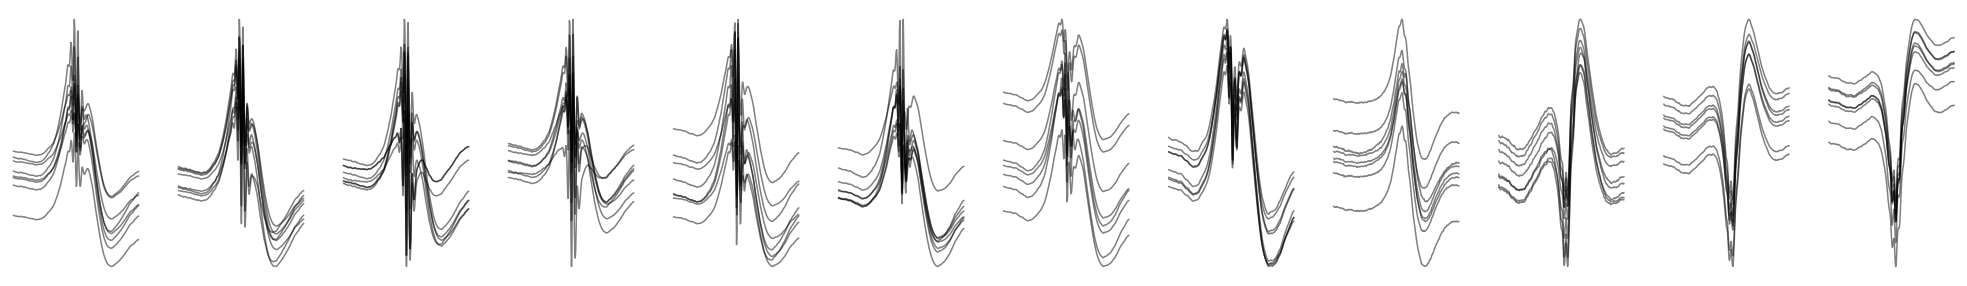

In [4]:
fig,ax = plt.subplots(1,12,figsize=(35,5))
for i,rip in enumerate(ripple_average):
    offset = channel_df[channel_df.shank == i].channelDistance.T
    ax[i].plot(ripple_time_axis,rip,alpha=.5,color='k')
    ax[i].axis('off')
    ax[i].axis('tight')
plt.show()


In [91]:
np.vstack(data['deepSuperficialfromRipple']['ripple_channels'][0][0][0]).flatten()

for shank_i,shank in enumerate(data['deepSuperficialfromRipple']['ripple_channels'][0][0][0]):
    # a,b,c = np.intersect1d(channel_df.channel,shank,return_indices=True)
    # channel_df.loc[b,'shank'] = shank_i
    a,b,c = np.intersect1d(shank,channel_df.channel,return_indices=True)
    print(shank)
    print(b)

# channel_df

[[8 7 6 5 4 3 2 1]]
[7 6 5 4 3 2 1 0]
[[16 15 14 13 12 11 10  9]]
[7 6 5 4 3 2 1 0]
[[24 23 22 21 20 19 18 17]]
[7 6 5 4 3 2 1 0]
[[32 31 30 29 28 27 26 25]]
[7 6 5 4 3 2 1 0]
[[40 39 38 37 36 35 34 33]]
[7 6 5 4 3 2 1 0]
[[48 47 46 45 44 43 42 41]]
[7 6 5 4 3 2 1 0]
[[56 55 54 53 52 51 50 49]]
[7 6 5 4 3 2 1 0]
[[64 63 62 61 60 59 58 57]]
[7 6 5 4 3 2 1 0]
[[72 71 70 69 68 67 66 65]]
[7 6 5 4 3 2 1 0]
[[80 79 78 77 76 75 74 73]]
[7 6 5 4 3 2 1 0]
[[88 87 86 85 84 83 82 81]]
[7 6 5 4 3 2 1 0]
[[96 95 94 93 92 91 90 89]]
[7 6 5 4 3 2 1 0]


In [25]:
collect = []
for item in channelClass:
    try:
        collect.append(item[0][0])
    except:
        collect.append('unknown')
len(collect)

99

In [16]:
# channelClass[0][0][0]
channelClass = [item[0][0] for item in channelClass]
channelClass

IndexError: index 0 is out of bounds for axis 0 with size 0